In [1]:
import os
import numpy as np
import scipy.misc as smp
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.ndimage import gaussian_filter
from matplotlib.image import NonUniformImage

plt.rcParams['font.family'] = ['Times New Roman']

plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams.update({'font.size': 30})
plt.rcParams["axes.labelweight"] = "bold"


In [2]:
def para_data(file_name):
    Data = {}
    with open(file_name) as f:
        lines = [line for line in f]
        for x in lines:
            info = x.strip().split('=')
            ind = tuple([float(y) for y in info[0][1:-2].split(',')])
            val = tuple([float(y) for y in info[1][2:-1].split(',')])
            Data[ind] = val
    return Data


file_name0 = 'four_dim0.dat'
file_name1 = 'four_dim2.dat'
file_name2 = 'four_dim3.dat'

Data = para_data(file_name0)
Data1 = para_data(file_name1)
Data2 = para_data(file_name2)

In [10]:
#[alpha, b, lambda, m, delta, rho]

def one_graph(Data,others, pinfo,need_x = True,need_y =True, xinfo = '', yinfo = ''):
    Labels = ['r','b','T','G']
    Colors = [[],[1,0,0],[0,0,1],[1,0,1],[0,0,0],[180/255,0,0],[0,0,0.5],[0.5,0,0.5],[1,1,0]
                ,[1,0.5,0],[0,1,0],[0.5,0.5,0.5],[160/255,160/255,0],[180/255,80/255,0],[0,138/255, 0],[0.98,0.98,0.98]]
    #D = 1
    #C = 10 2
    #TD = 100 4
    #TC = 1000 8
    two_dim = [index for index,value in enumerate(others) if value == -1]
    for ind in Data:
        continue_next = False
        for i in range(len(others)):
            if others[i] != -1 and others[i] != ind[i]:
                continue_next = True
        if continue_next:
            continue
    
        color_index = 0;
        color_index += (1 if Data[ind][0] >= 0.01 else 0)
        color_index += (2 if Data[ind][1] >= 0.01 else 0)
        color_index += (4 if Data[ind][2] >= 0.01 else 0)
        color_index += (8 if Data[ind][3] >= 0.01 else 0)
        
        
        col = Colors[color_index].copy()
        
        pinfo.scatter(ind[two_dim[1]],ind[two_dim[0]],marker='s', color = tuple(col),linewidth=2)
        
    '''
    pinfo.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,
        right=False,
        labelleft=False,
        labelbottom=False) # labels along the bottom edge are off
    if need_x:
        pinfo.set_xlabel( Labels[two_dim[1]] + '\n' + xinfo)
    if need_y:
        pinfo.set_ylabel( Labels[two_dim[0]], rotation = 0)
        if two_dim[1] == 1:
            pinfo.text(0,0.5,yinfo)
        elif two_dim[0] == 1:
            pinfo.text(-1,1.5,yinfo)            
        else:
            pinfo.text(-1,0.5,yinfo)
    '''
    if need_y:
        pinfo.set_yticks([3,5])
        pinfo.set_yticklabels([3,5])    
    
        low,up = pinfo.get_yticklabels()[0], pinfo.get_yticklabels()[1]
        low.set_va('bottom')
        up.set_va('top')
    
    if need_x:
        pinfo.set_xticks([0,1])
        pinfo.set_xticklabels([0,1])
        left,right = pinfo.get_xticklabels()[0], pinfo.get_xticklabels()[1]
        left.set_ha('left')
        right.set_ha('right')    
        

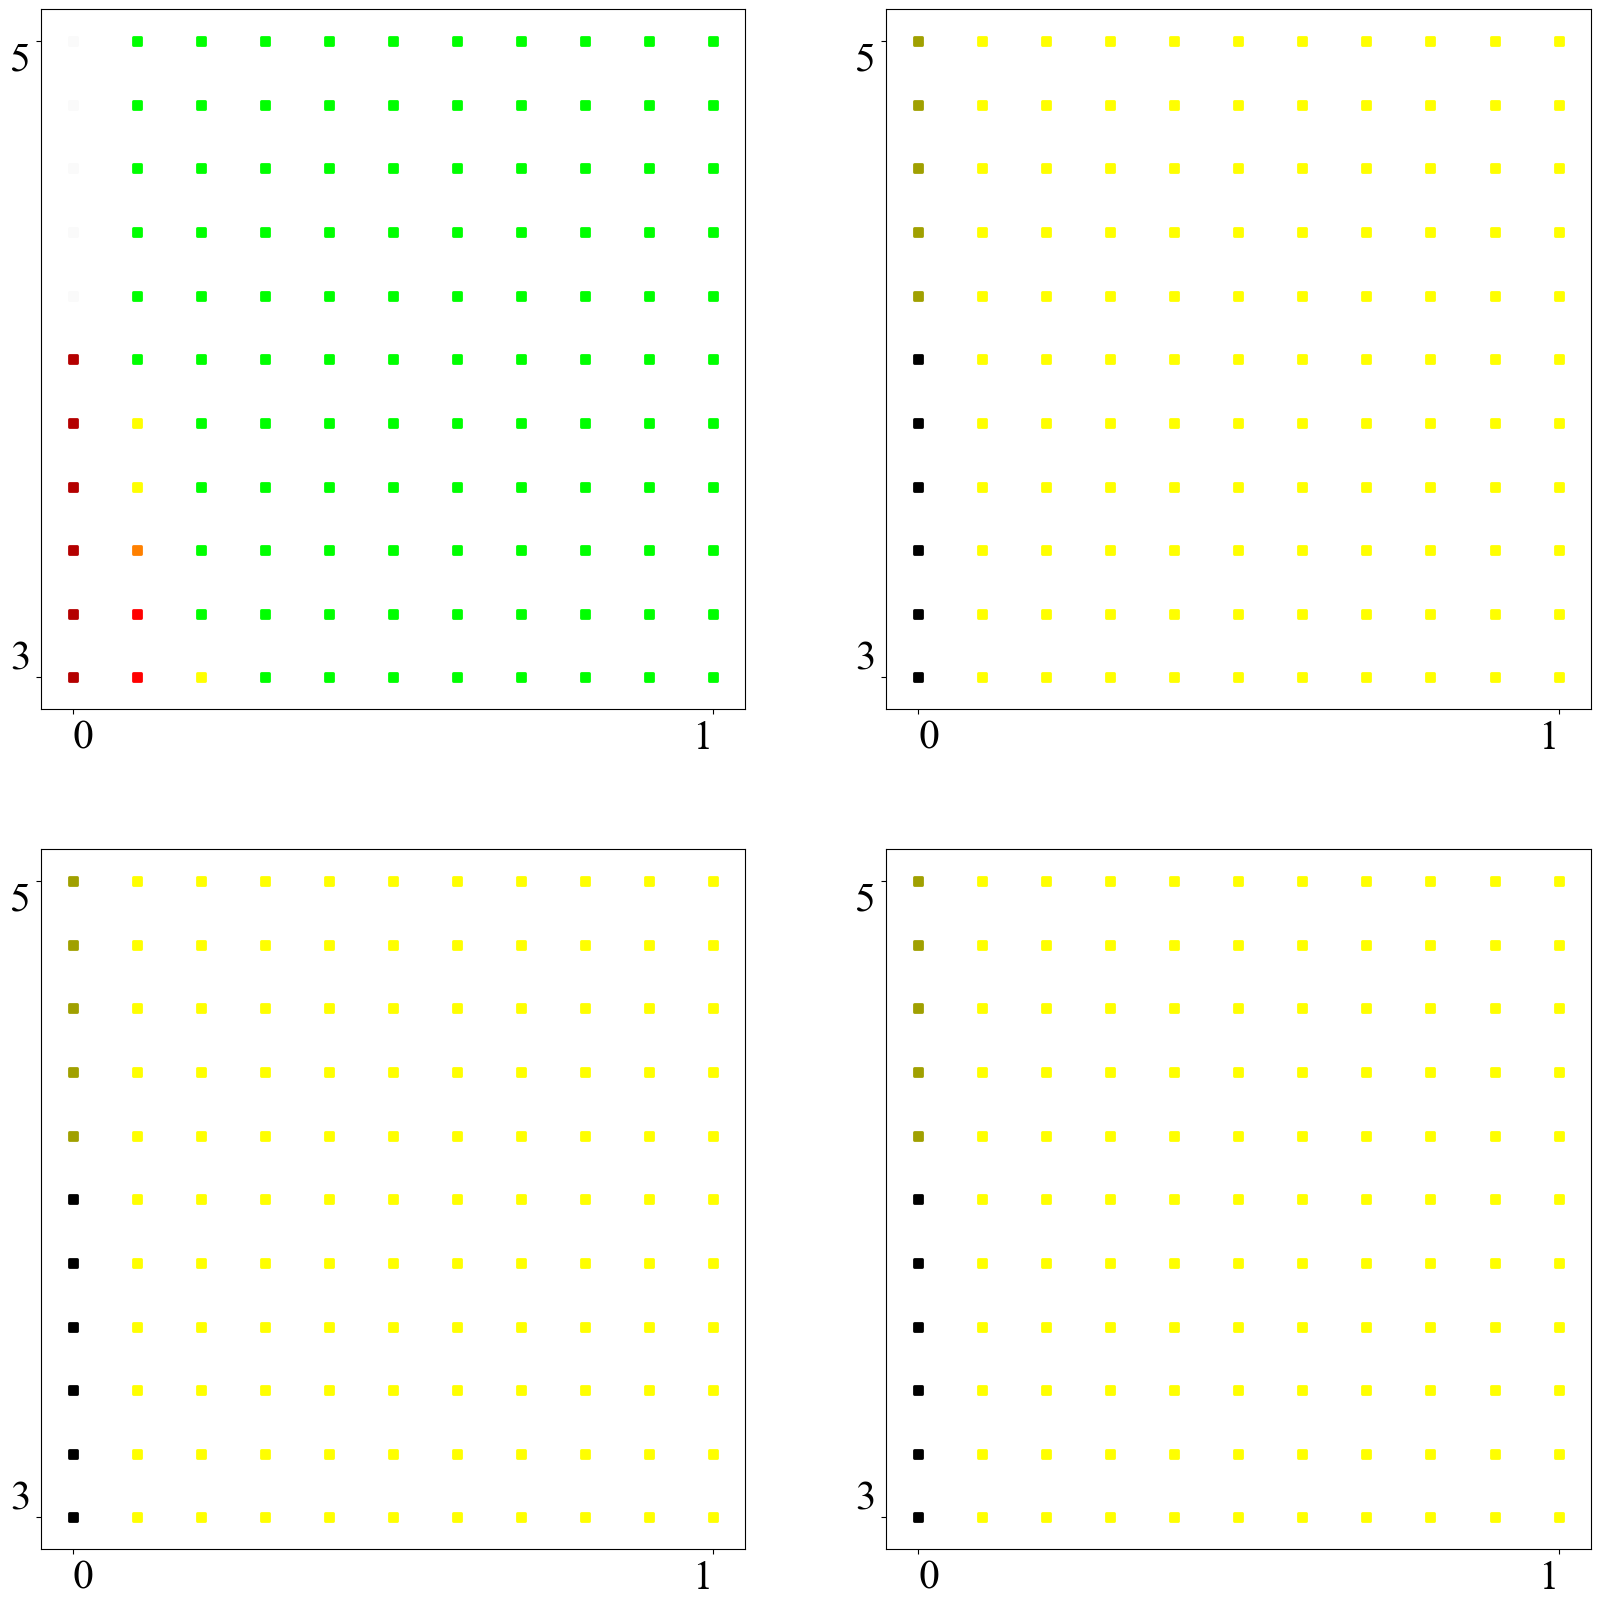

In [4]:
#one_graph(Data,[0,1,0,-1,-1,0],plt)
#Labels = ['$\alpha$','b',\lambda,'m',\delta$,'r']    

fig, axs = plt.subplots(2,2)
one_graph(Data,[-1,-1,0.0,0.0],axs[0,0])
one_graph(Data,[-1,-1,1,0.2],axs[0,1])
#one_graph(Data,[-1,1.25,-1,0.25,0,0.5],axs[0,0])

one_graph(Data,[-1,-1,0.5,0.4],axs[1,0])
one_graph(Data,[-1,-1,0.5,0.5],axs[1,1])



In [5]:
def all_ten(Data,IsOne=0):
    grid_siz = 11
    Labels = ['r','b','T','G']    
    #info = [a,b,-1,-1], always
    fig = plt.figure()
    gs = fig.add_gridspec(grid_siz,grid_siz, hspace=0.01, wspace=0.01)
    axs = gs.subplots(sharex='col', sharey='row')
        
    
    num_list = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    for i in range(grid_siz):
        for j in range(grid_siz):
            k = 10 - i
            new_info = [-1,-1,0,0]
            new_info[2] = num_list[k]
            new_info[3] = num_list[j]
            need_x = (i == 10)
            need_y = (j == 0)
            
            y_info = Labels[2] + '=' + '{:1.1f}'.format(k * 0.1)
            x_info = Labels[3] + '=' + '{:1.1f}'.format(j * 0.1)
            
            if IsOne == 0:
                one_graph(Data,new_info,axs[ i , j],need_x, need_y,x_info, y_info)
            elif IsOne == 1:
                Coop_graph(Data,new_info,axs[ i , j],need_x, need_y,x_info, y_info)
            else:
                Tax_graph(Data,new_info,axs[ i , j],need_x, need_y,x_info, y_info)

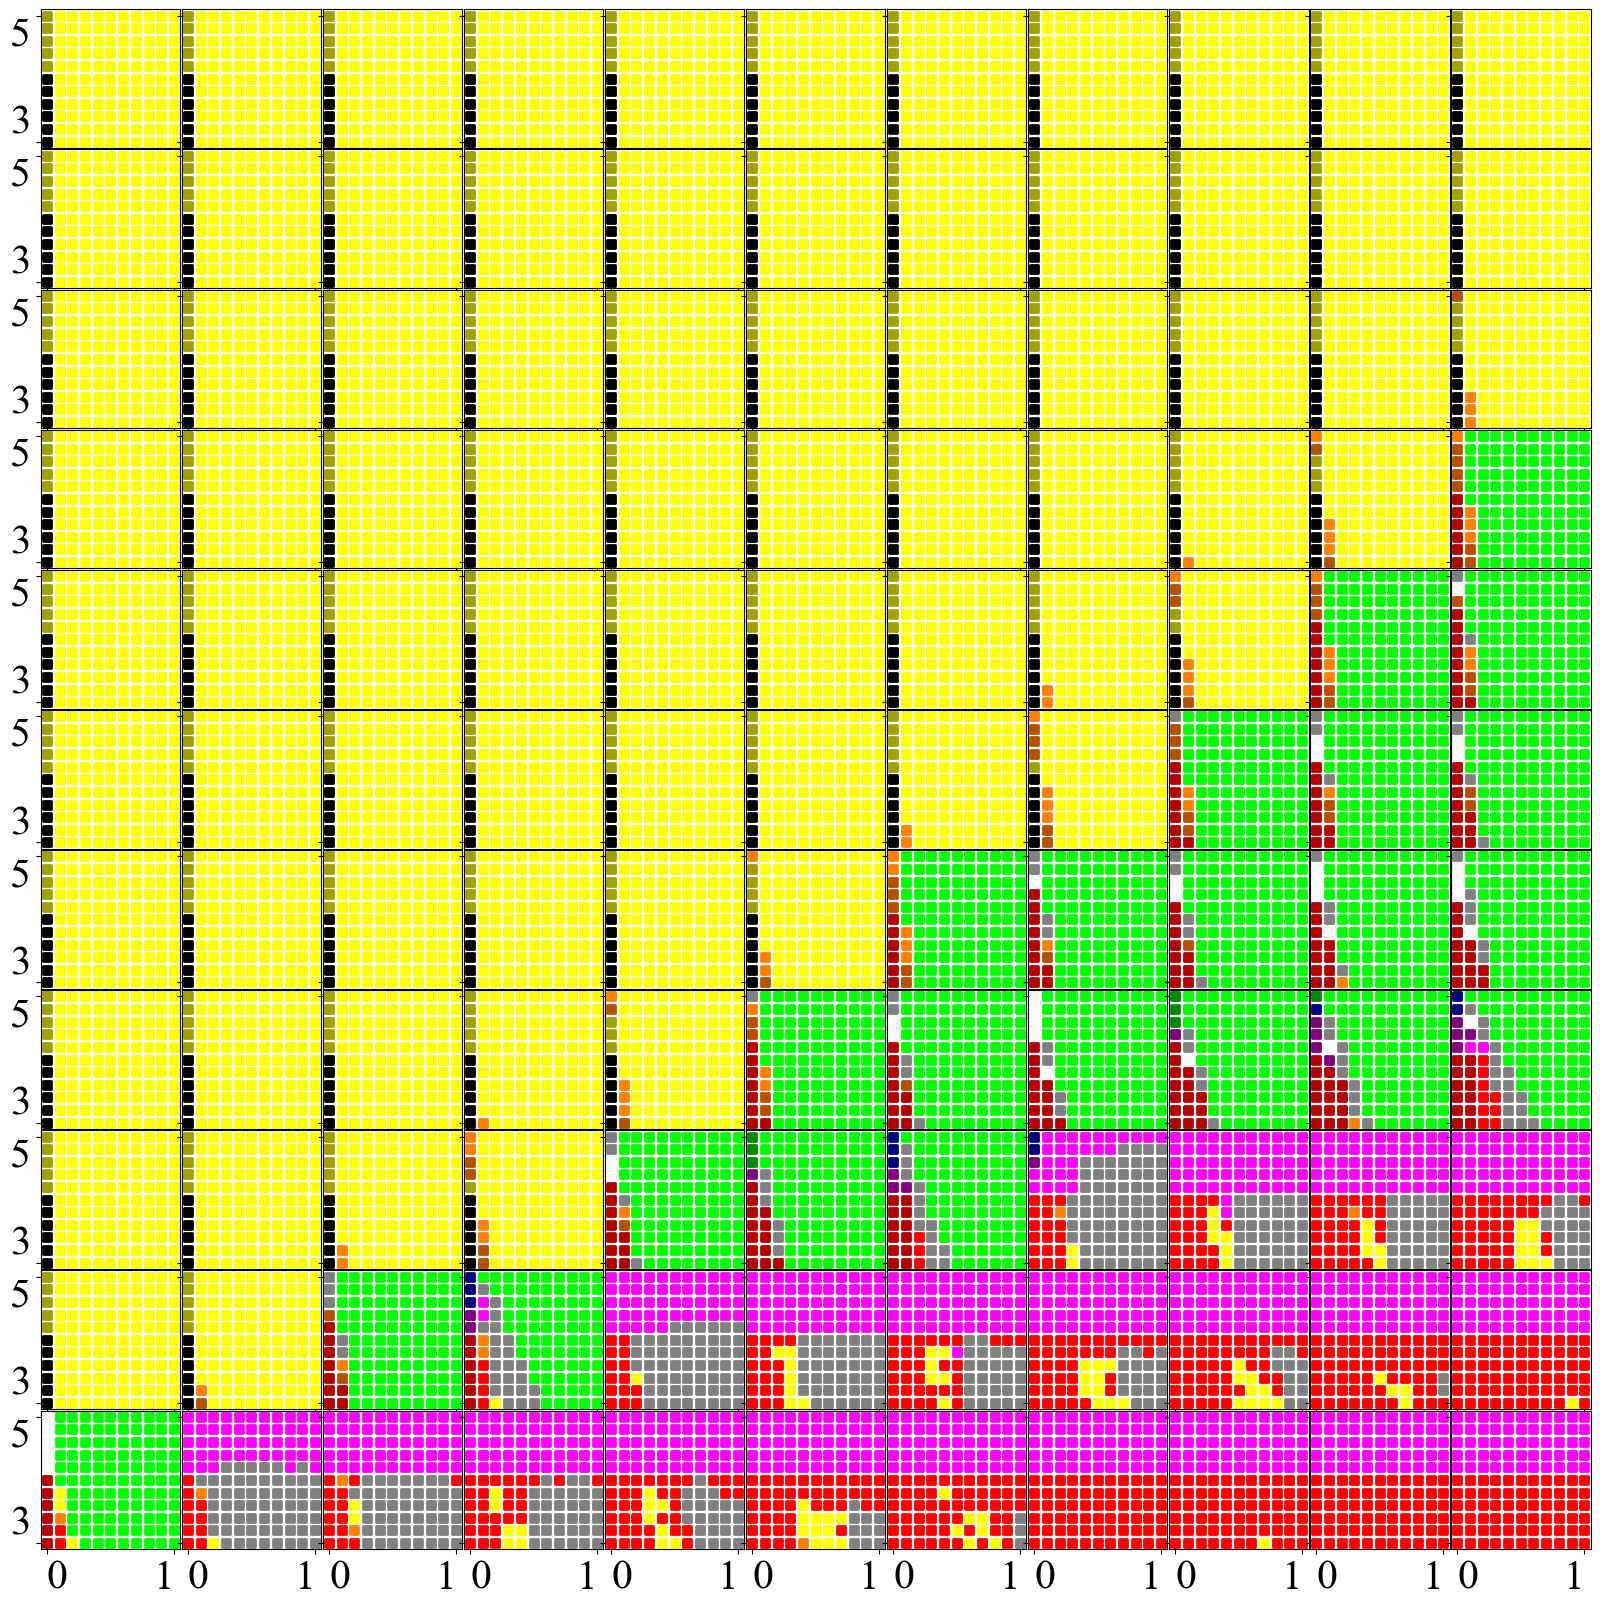

In [7]:
#[alpha, b, lambda, m, delta, rho]

file_name = 'four_dim0.dat'
plt.rcParams.update({'font.size': 30})


all_ten(Data)
plt.savefig('all_data_0.png', dpi=200)

In [17]:
#[alpha, b, lambda, m, delta, rho]

def Coop_graph(Data,others, pinfo,need_x = True,need_y =True, xinfo = '', yinfo = ''):
    Labels = ['r','b','T','G']

    two_dim = [index for index,value in enumerate(others) if value == -1]
    for ind in Data:
        continue_next = False
        for i in range(len(others)):
            if others[i] != -1 and others[i] != ind[i]:
                continue_next = True
        if continue_next:
            continue
            
        ExistDefect = False
        ExistCoop = False
        
        if Data[ind][0] >= 0.01 or Data[ind][2] >= 0.01:
            ExistDefect = True
        if Data[ind][1] >= 0.01 or Data[ind][3] >= 0.01:
            ExistCoop = True
        
        
        if ExistDefect and ExistCoop:
            col = [1,1,1]
        elif ExistCoop:
            col = [0,1,0]
        else:
            col = [180/255,0,0]
        
        pinfo.scatter(ind[two_dim[1]],ind[two_dim[0]],marker='s', color = tuple(col),linewidth=2)
        

    if need_y:
        pinfo.set_yticks([3,5])
        pinfo.set_yticklabels([3,5])    
    
        low,up = pinfo.get_yticklabels()[0], pinfo.get_yticklabels()[1]
        low.set_va('bottom')
        up.set_va('top')
    
    if need_x:
        pinfo.set_xticks([0,1])
        pinfo.set_xticklabels([0,1])
        left,right = pinfo.get_xticklabels()[0], pinfo.get_xticklabels()[1]
        left.set_ha('left')
        right.set_ha('right')    
        

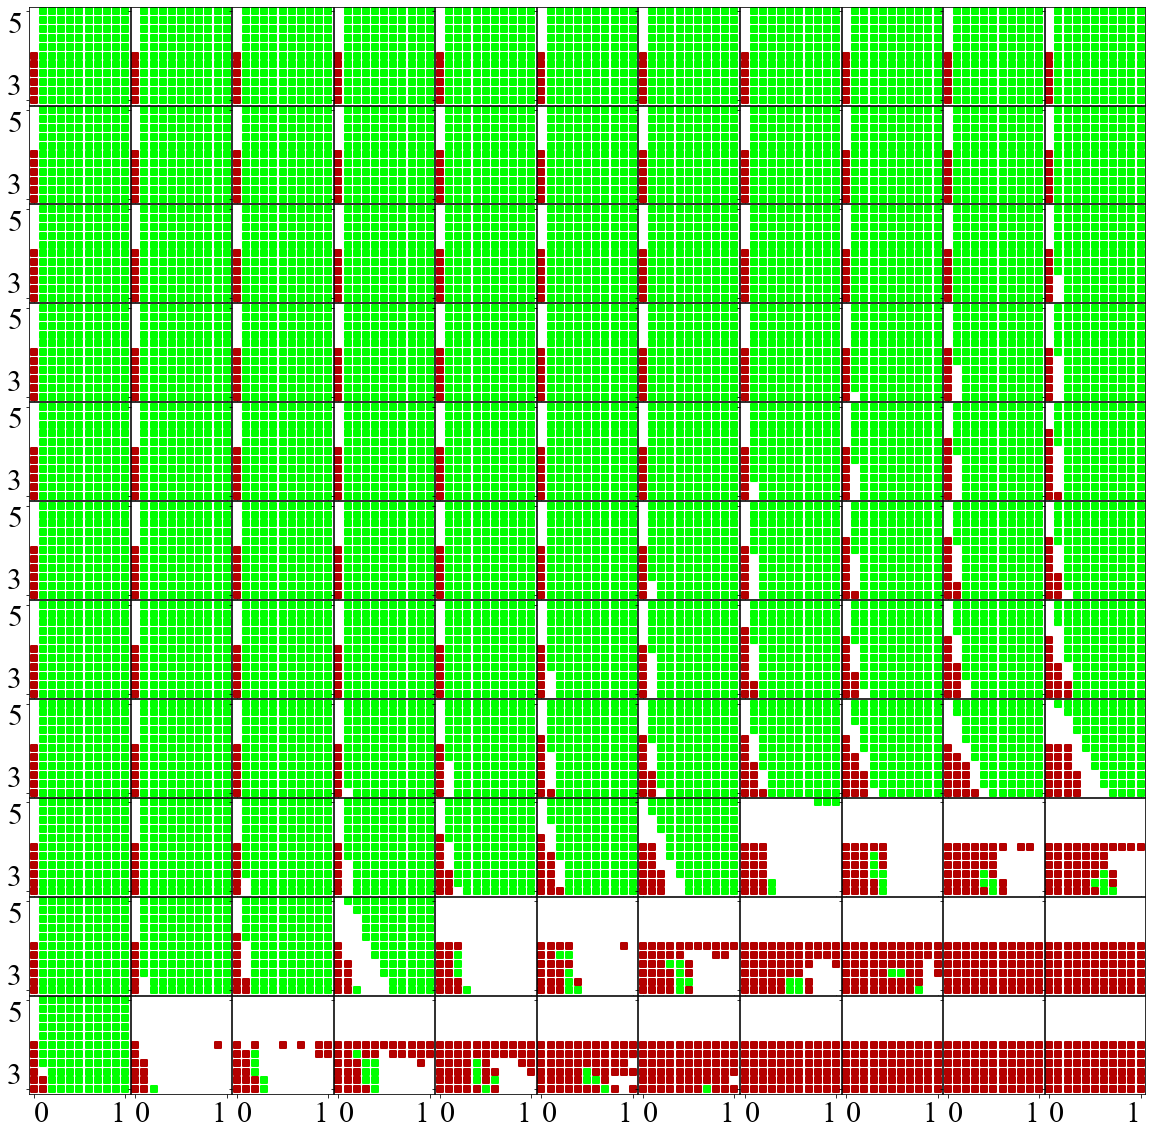

In [18]:
all_ten(Data,1)
plt.savefig('all_DC.png', dpi=200)

In [19]:
#[alpha, b, lambda, m, delta, rho]

def Tax_graph(Data,others, pinfo,need_x = True,need_y =True, xinfo = '', yinfo = ''):
    Labels = ['r','b','T','G']

    two_dim = [index for index,value in enumerate(others) if value == -1]
    for ind in Data:
        continue_next = False
        for i in range(len(others)):
            if others[i] != -1 and others[i] != ind[i]:
                continue_next = True
        if continue_next:
            continue
            
        
        ExistPay = False
        ExistTrad = False
        if Data[ind][0] >= 0.01 or Data[ind][1] >= 0.01:
            ExistTrad = True
        if Data[ind][2] >= 0.01 or Data[ind][3] >= 0.01:
            ExistPay = True
        
        if ExistTrad and ExistPay:
            col = [1,1,1]
        elif ExistTrad:
            col = [1,0,1]
        else:
            col = [180/255,0,0]
        
        pinfo.scatter(ind[two_dim[1]],ind[two_dim[0]],marker='s', color = tuple(col),linewidth=2)
        

    if need_y:
        pinfo.set_yticks([3,5])
        pinfo.set_yticklabels([3,5])    
    
        low,up = pinfo.get_yticklabels()[0], pinfo.get_yticklabels()[1]
        low.set_va('bottom')
        up.set_va('top')
    
    if need_x:
        pinfo.set_xticks([0,1])
        pinfo.set_xticklabels([0,1])
        left,right = pinfo.get_xticklabels()[0], pinfo.get_xticklabels()[1]
        left.set_ha('left')
        right.set_ha('right')    
        

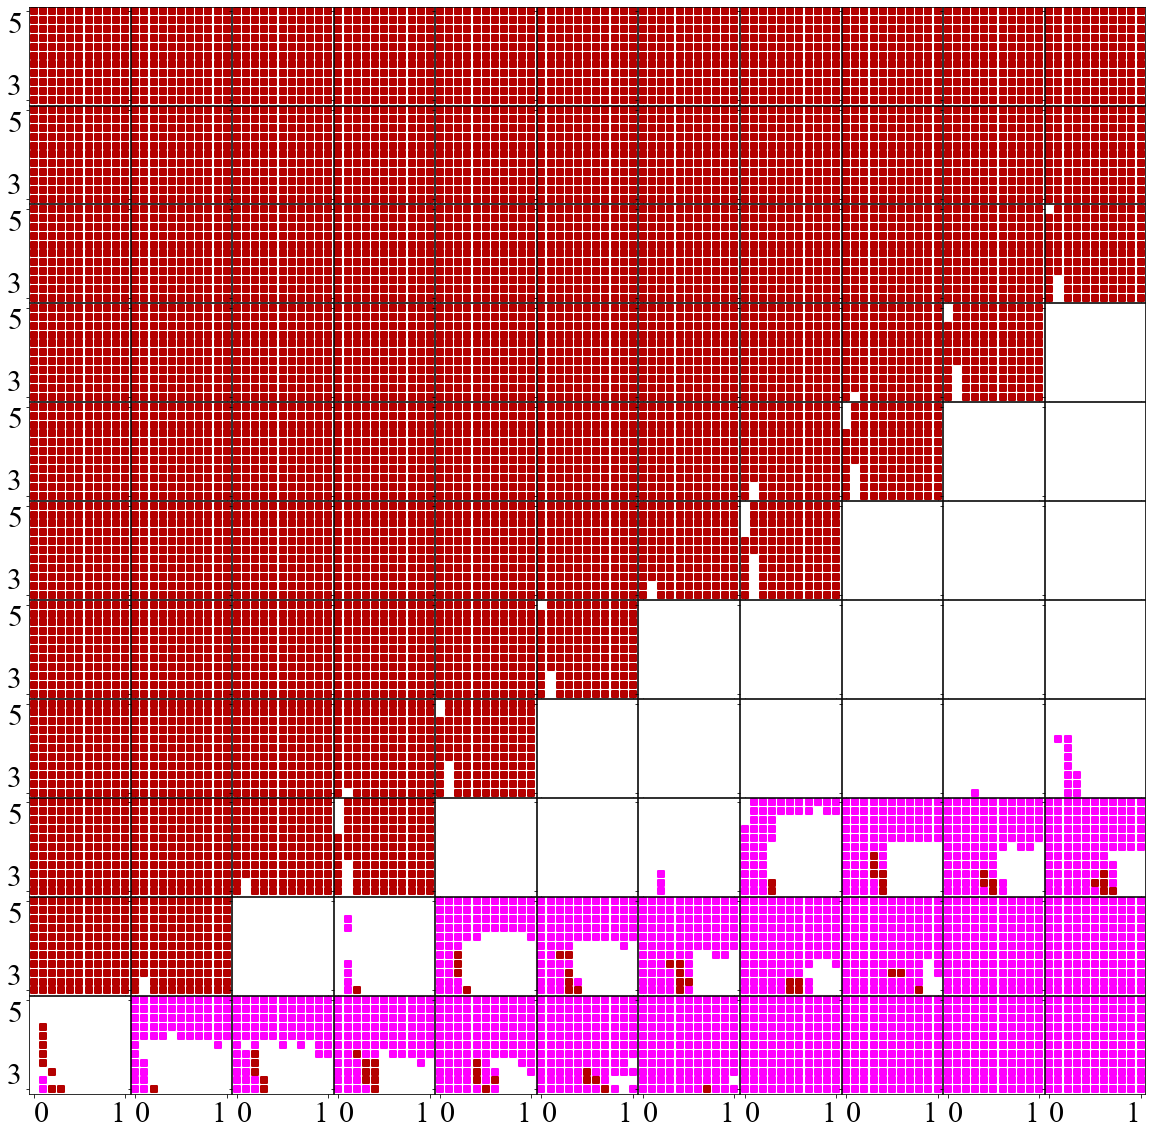

In [20]:
all_ten(Data,2)
plt.savefig('all_NP.png', dpi=200)

In [9]:
#[alpha, b, lambda, m, delta, rho]

def Fcolor_index(d_info):
    color_index = 0;
    color_index += (1 if d_info[0] >= 0.01 else 0)
    color_index += (2 if d_info[1] >= 0.01 else 0)
    color_index += (4 if d_info[2] >= 0.01 else 0)
    color_index += (8 if d_info[3] >= 0.01 else 0)
    return color_index

def one_graph_vote(Data1,Data2,Data3,others, pinfo,need_x = True,need_y =True, xinfo = '', yinfo = ''):
    Labels = ['r','b','T','G']
    Colors = [[],[1,0,0],[0,0,1],[1,0,1],[0,0,0],[180/255,0,0],[0,0,0.5],[0.5,0,0.5],[1,1,0]
                ,[1,0.5,0],[0,1,0],[0.5,0.5,0.5],[160/255,160/255,0],[180/255,80/255,0],[0,138/255, 0],[0.98,0.98,0.98]]
    #D = 1
    #C = 10 2
    #PD = 100 4
    #PC = 1000 8
    two_dim = [index for index,value in enumerate(others) if value == -1]
    for ind in Data1:
        continue_next = False
        for i in range(len(others)):
            if others[i] != -1 and others[i] != ind[i]:
                continue_next = True
        if continue_next:
            continue

        d_list = [Fcolor_index(Data1[ind]), Fcolor_index(Data2[ind]), Fcolor_index(Data3[ind])]
        color_index = max(set(d_list), key = d_list.count)
        if color_index == 8:
            EventA = (others[2] == 0 and others[3] > 0)
            EventB = (others[2] == 0.1 and others[3] > 0) 
            EventC = (others[2] == 0.2 and others[3] > 0.6)
            if EventA or EventB or EventC:
                color_index = 1
        
        col = Colors[color_index].copy()
        
        pinfo.scatter(ind[two_dim[1]],ind[two_dim[0]],marker='s', color = tuple(col),linewidth=2)
        
    '''
    pinfo.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,
        right=False,
        labelleft=False,
        labelbottom=False) # labels along the bottom edge are off
    if need_x:
        pinfo.set_xlabel( Labels[two_dim[1]] + '\n' + xinfo)
    if need_y:
        pinfo.set_ylabel( Labels[two_dim[0]], rotation = 0)
        if two_dim[1] == 1:
            pinfo.text(0,0.5,yinfo)
        elif two_dim[0] == 1:
            pinfo.text(-1,1.5,yinfo)            
        else:
            pinfo.text(-1,0.5,yinfo)
    '''
    if need_y:
        pinfo.set_yticks([3,5])
        pinfo.set_yticklabels([3,5])    
    
        low,up = pinfo.get_yticklabels()[0], pinfo.get_yticklabels()[1]
        low.set_va('bottom')
        up.set_va('top')
    
    if need_x:
        pinfo.set_xticks([0,1])
        pinfo.set_xticklabels([0,1])
        left,right = pinfo.get_xticklabels()[0], pinfo.get_xticklabels()[1]
        left.set_ha('left')
        right.set_ha('right')    
        

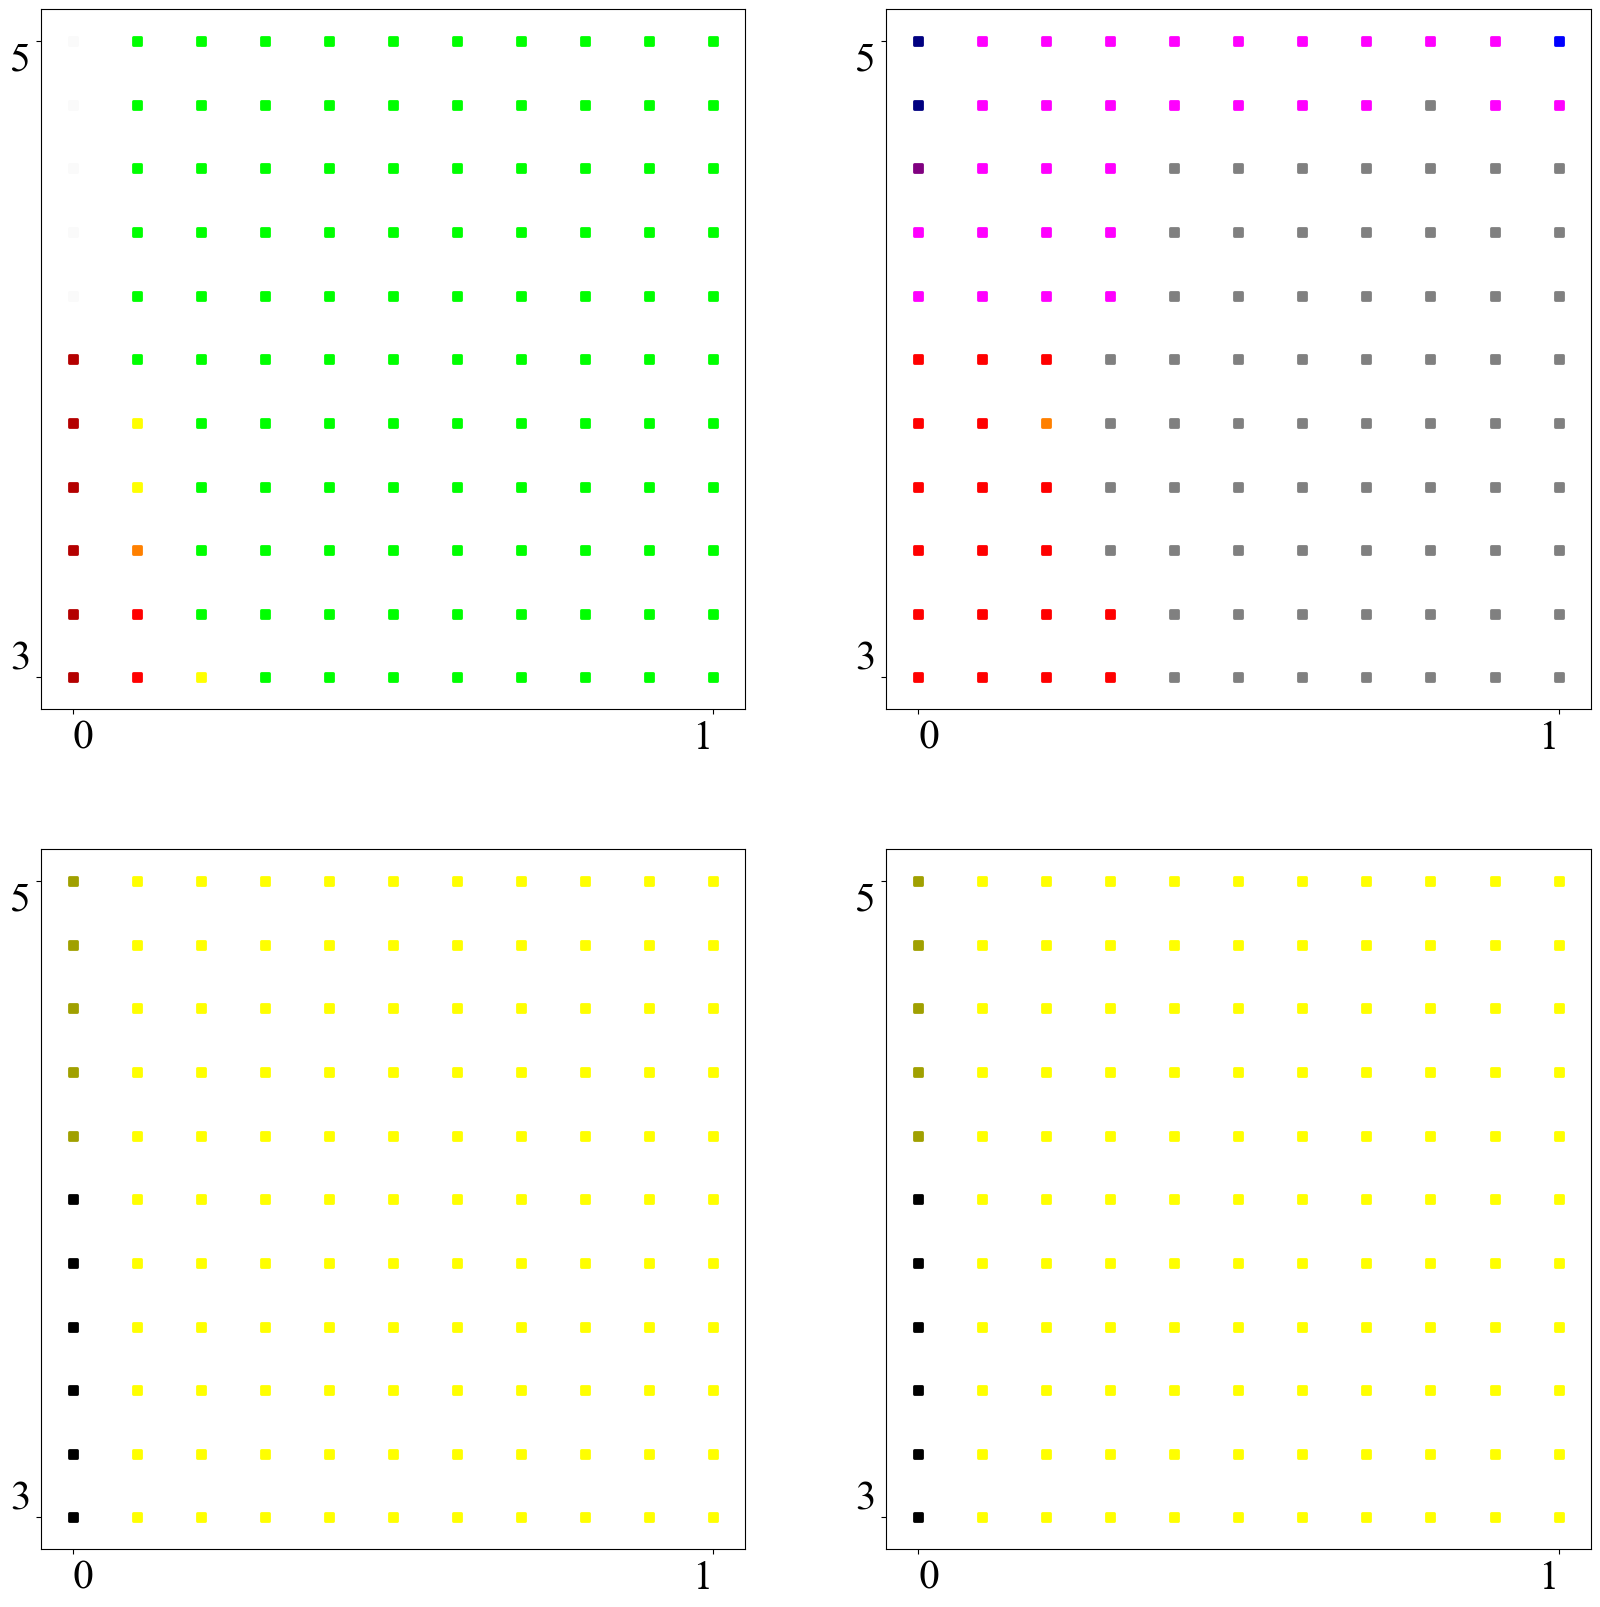

In [11]:
fig, axs = plt.subplots(2,2)
one_graph_vote(Data,Data1,Data2,[-1,-1,0.0,0.0],axs[0,0])
one_graph_vote(Data,Data1,Data2,[-1,-1,0.2,0.7],axs[0,1])
#one_graph(Data,[-1,1.25,-1,0.25,0,0.5],axs[0,0])

one_graph_vote(Data,Data1,Data2,[-1,-1,0.5,0.4],axs[1,0])
one_graph_vote(Data,Data1,Data2,[-1,-1,0.5,0.5],axs[1,1])



In [12]:
def all_ten_vote(Data,Data1,Data2,IsOne=0):
    grid_siz = 11
    Labels = ['r','b','T','G']    
    #info = [a,b,-1,-1], always
    fig = plt.figure()
    gs = fig.add_gridspec(grid_siz,grid_siz, hspace=0.01, wspace=0.01)
    axs = gs.subplots(sharex='col', sharey='row')
        
    
    num_list = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    for i in range(grid_siz):
        for j in range(grid_siz):
            k = 10 - i
            new_info = [-1,-1,0,0]
            new_info[2] = num_list[k]
            new_info[3] = num_list[j]
            need_x = (i == 10)
            need_y = (j == 0)
            
            y_info = Labels[2] + '=' + '{:1.1f}'.format(k * 0.1)
            x_info = Labels[3] + '=' + '{:1.1f}'.format(j * 0.1)
            
            if IsOne == 0:
                one_graph_vote(Data,Data1,Data2,new_info,axs[ i , j],need_x, need_y,x_info, y_info)
            elif IsOne == 1:
                Coop_graph(Data,new_info,axs[ i , j],need_x, need_y,x_info, y_info)
            else:
                Tax_graph(Data,new_info,axs[ i , j],need_x, need_y,x_info, y_info)

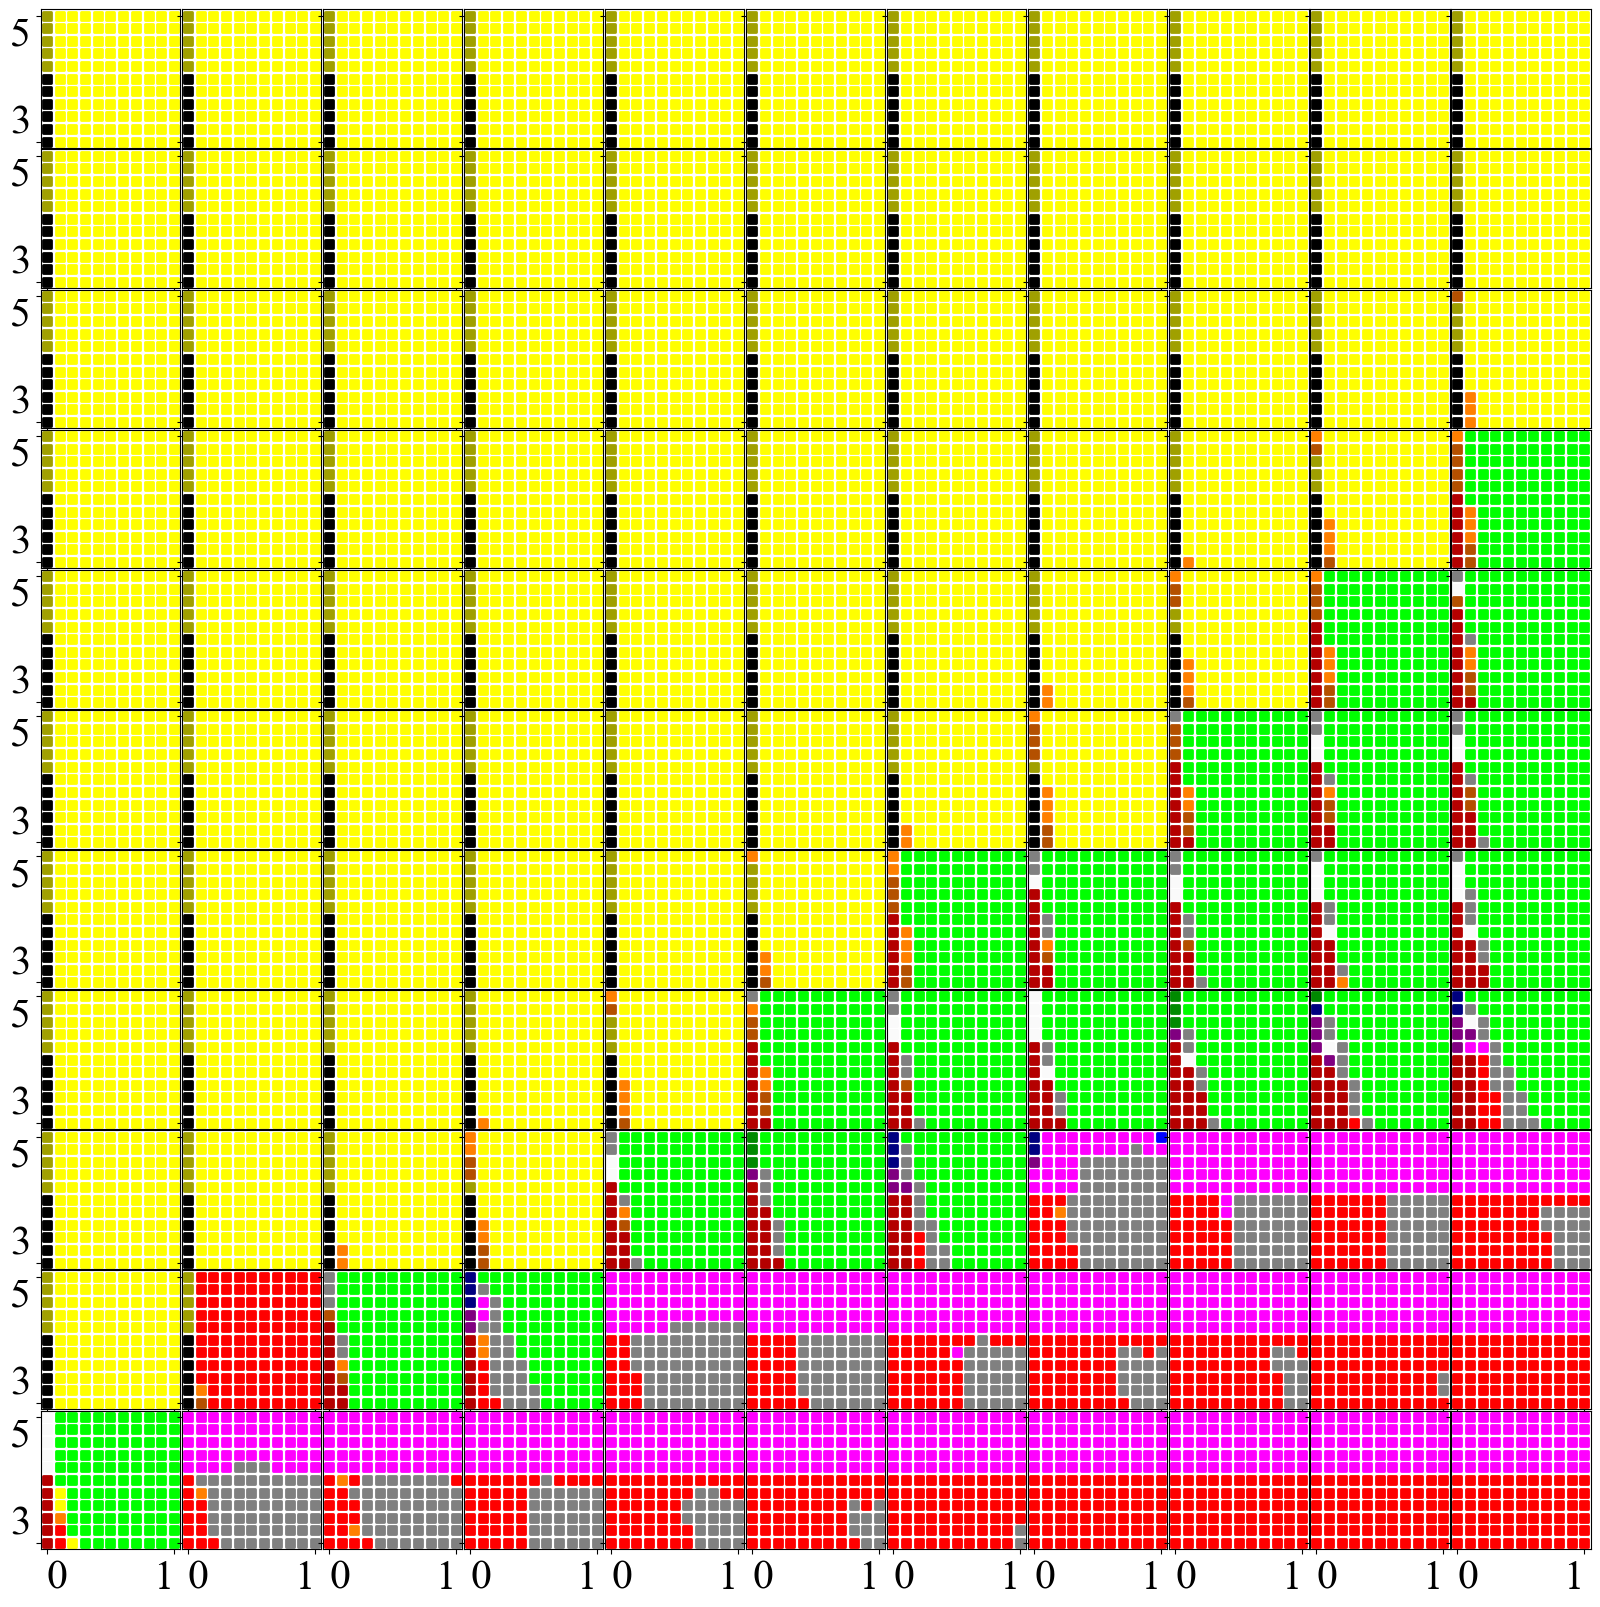

In [13]:
#[alpha, b, lambda, m, delta, rho]

plt.rcParams.update({'font.size': 30})

all_ten_vote(Data,Data1,Data2)
plt.savefig('all_data_v.png', dpi=200)